In [1]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 15.0.2 which is incompatible.


In [3]:
from duckduckgo_search import AsyncDDGS

from fastcore.all import *

async def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    results = await AsyncDDGS().images(keywords=term, region='wt-wt', safesearch='off', max_results=max_images)
    #print(f"results '{results[0]}'")
    return L(results).itemgot('image')


In [4]:
results = await search_images('bird photos', max_images=1)
print(f"results '{results}'")

Searching for 'bird photos'
results '['https://images.pexels.com/photos/1661179/pexels-photo-1661179.jpeg?cs=srgb&dl=green-bird-1661179.jpg&fm=jpg']'


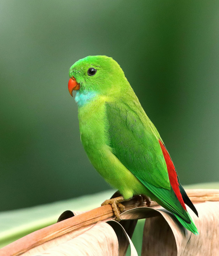

In [5]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(results[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)